# Classifier Series - Naive Byes Sentiment Analysis

What is Naive Bayes?

Naive Bayes is a simple and easy to understand machine learning technique that helps us make predictions based 
on probabilities.It`s called 'naive' because it assumes that the different pieces of information(or features) in our data
which doesn`t affect each other when predicting an outcome.

The formula for Naive Bayes is derived from Bayes theorem, which relates the conditional probabilities of two events.

In the context of classification, we have a set of features(X1,X2,----,Xn) and a class label(C). The goal is to find the
probability of the class label given the features, P(C|X1,X2,...,Xn)

Baye`s theorem states:

P(C|X)=(PX|C)*P(C)/P(X)

Where :

    P(C|X)is the posterior probability, or the probability of the class C given the features X.
    
    P(X|C)is the likelihood, or the probability of the features X given the class C.
    
    P(C) is the prior probability, or the probability of the class C occurring in the dataset.
    
    P(X) is the marginal probability, or the probability of the features X occurring in the dataset.

In Naive Bayes, we assume that the features are conditionally independent given the class label. This means 
we can simplify the likelihood term as the product of the probabilities of each feature given in the class:

P(X1,X2,...Xn|C)=P(X1|C*P(X2|C)*...*P(Xn|C)*P(C))/P(X1,X2,....,Xn)

To make a prediction, we calculate the probability for each class and choose the class with the highest probability.
Since the denominator (P(X1,X2,...,Xn)) is constant for all classes, we can ignore it for the sake of comparision.

P(C|X1,X2,...,Xn)- P(X1|C)*P(X2|C)*...*P(Xn|C)* P(C)

In summary, the Naive Bayes formula calculates the probability of each feature given the class and the prior probability of the class.

The class with the highest probability is chosen as the prediction.

Types of Navie Bayes Classifiers

Gaussian Naive Bayes: Works well with continuous data (e.g., age,income)

Multinomial Naive Bayes: Suitable for text data or counts(e.g., word occurences in a document)
    
Bernoulli Naive Bayes: Works with binary data(e.g., yes or no , true of false)
    
Complement Naive Bayes: An improvement over Multinomial Naive Bayes, especially for imbalanced datasets

Benefits of Naive Bayes

1. Easy to understand and implement
2. Fast training and prediction times.
3. Can handle both numerical and categorical data
4. Can work well even with limited data

Drawbacks of Naive Bayes

1. Assumes feature independence, which is often not true in real-world situations
2. May not perform well if some features are highly related to each other.


When to Use Naive Bayes

1. When you need a quick and easy-to-understand solution.
2. When your data is a mix of numbers and categories.
3. When you have limited data for training


When not to use Naive Bayes

When the features in your data are highly related to each other

When you need a more complex model for better understanding of the relationships in your data

Applications of Naive Bayes

1. Spam email detection
2. Sentiment Analysis
3. Document Classification
4. Medical Diagnosis



Data Chosen: The Cornell Movie Review Data Set
    
    The Cornell Movie Revie Dataset is a collection of movie reviews from the internet Movie DAtabase(IMDb) that have been
    preprocessed and labeled for sentiment analysis. The dataset contains 2000 reviews, with 1000 positive and 1000 negetive
    reviews. Each review is stored in a seperate text file, and the positive and negetive reviews are organized into two
    different folders, 'pos' and 'neg' respectively.
    
    The dataset is particularly useful for sentiment analysis tasks, as it provides a balanced dataset with an equal number
    of positive and negetive reviews. The reviews in this dataset cover a wide range of movies, generes, and writing styles,
    making it a versatile dataset for training and evaluating sentiment analysis models.
    
(Link:https://www.cs.cornell.edu/people/pabo/movie-review-data/)


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

What is the purpose of sentiment analysis

Sentiment analysis helps figure out the feelings or opinions in a text, like reviews or social media posts. It`s used to
understand people`s emotions and can be helpful in various areas.

Businesses use it to improve customer service by analyzing feedback. It helps monitor social media and track how people feel
about a brand. Researches can understand market trends and people`s opinions on different topics. Politicians can use it to
adjust their strategies based on public opinion. Content platforms can give personalized recommendations based on user
feelings.

For the Cornell Movie Review Dataset, sentiment analysis helps us understand if movie reviews are positive or negative.
This information is useful for movie makers to know how their movies are received by the audience.





























In [8]:
#importing necessary libraries

import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

In [9]:
def load_data(data_path):
    pos_reviews=[]
    neg_reviews=[]
    
    for file in os.listdir(data_path+'/pos'):
        with open(os.path.join(data_path,'pos', file), 'r', encoding='utf-8') as f:
            pos_reviews.append(f.read())
    for file in os.listdir(data_path+'/neg'):
        with open(os.path.join(data_path,'neg',file),'r',encoding='utf-8') as f:
            neg_reviews.append(f.read())
        
    all_reviews=pd.DataFrame({
        'review':pos_reviews+neg_reviews,
        'sentiment':['positive']*len(pos_reviews)+['negetive']*len(neg_reviews)
    })
    
    return all_reviews

# set the path to the folder containing the dataset

data_path= "C:/Users/KIRAN/Linkedin Posts/txt_sentoken"
reviews_df=load_data(data_path)
reviews_df.head()


,review,sentiment
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you've got mail works alot better than it dese...,positive
3,""" jaws "" is a rare film that grabs your atten...",positive
4,moviemaking is a lot like being the general ma...,positive


In [10]:
reviews_df['sentiment']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1995    negetive
1996    negetive
1997    negetive
1998    negetive
1999    negetive
Name: sentiment, Length: 2000, dtype: object

# Exploratory Data Analysis

In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [12]:
reviews_df.shape

(2000, 2)

In [13]:
reviews_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [14]:
reviews_df['sentiment'].value_counts()

positive    1000
negetive    1000
Name: sentiment, dtype: int64

# Step 1: Basic Statistics and dataset overview
    
    First, let`s examine the basic statistics of the dataset, such as the number of records, the distribution
    of sentiments and any missing values

In [15]:
# Dataset shape and sentiment distribution
print('Dataset Shape:', reviews_df.shape)
print(f"\n Sentiment Distribution: \n {reviews_df['sentiment'].value_counts()}")

#Check for missing values

check_missing=reviews_df.isnull().sum()*100/reviews_df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Dataset Shape: (2000, 2)

 Sentiment Distribution: 
 positive    1000
negetive    1000
Name: sentiment, dtype: int64


Series([], dtype: float64)

# Step 2: Text Length Analysis
    
    Analysze the length of the movie reviews and compare the distribution for positive and negative sentiments









In [16]:
#Calculate the length of the each review

reviews_df['review_length']=reviews_df['review'].apply(lambda x: len(x.split()))

In [17]:
reviews_df['review_length']

0        802
1        769
2        465
3       1178
4        748
        ... 
1995    1586
1996    1193
1997     447
1998     644
1999     591
Name: review_length, Length: 2000, dtype: int64

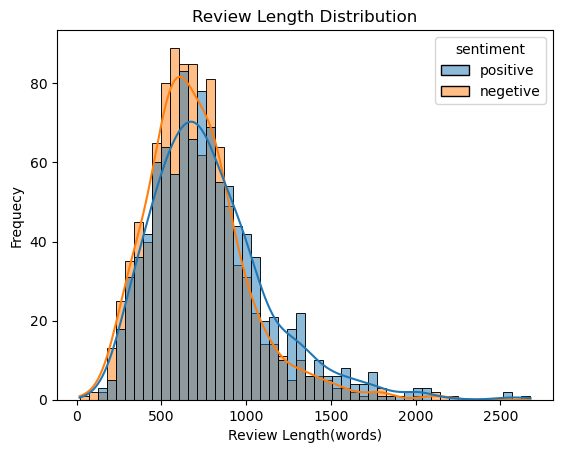

In [18]:
# plot the distribution of review lengths for positive and negative sentiments

sns.histplot(data=reviews_df,x='review_length',hue='sentiment', bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length(words)')
plt.ylabel('Frequecy')
plt.show()

# Step 3: Word Frequency Analysis

Explore the most frequent words in the reviews and compare their frequencies for positive and negetive sentiments

In [14]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

stop_words = set(stopwords.words('english'))

# Divide dataset into positive and negative subsets
pos_reviews = reviews_df[reviews_df['sentiment'] == 'positive']
neg_reviews = reviews_df[reviews_df['sentiment'] == 'negetive']

# Tokenize positive reviews and count word frequencies
pos_words = []
for review in pos_reviews['review']:
    words = [w.lower() for w in word_tokenize(review) if w.lower() not in stop_words]
    pos_words.extend(words)
pos_words_freq = Counter(pos_words)

# Tokenize negative reviews and count word frequencies
neg_words = []
for review in neg_reviews['review']:
    words = [w.lower() for w in word_tokenize(review) if w.lower() not in stop_words]
    neg_words.extend(words)
neg_words_freq = Counter(neg_words)


In [37]:
# Display top 10 frequest words for each sentiment

print('top 10 most frequent words in positive reviews:')
print(pos_words_freq.most_common(10))
print('\ntop 10 most frequent words in negative reviews:')
print(neg_words_freq.most_common(10))

top 10 most frequent words in positive reviews:
[(',', 42448), ('.', 33714), ("'s", 9473), ('``', 8494), (')', 6039), ('(', 6014), ('film', 5186), ('one', 2943), ("n't", 2775), ('movie', 2497)]

top 10 most frequent words in negative reviews:
[(',', 35269), ('.', 32162), ('``', 9131), ("'s", 8655), (')', 5742), ('(', 5650), ('film', 4257), ("n't", 3442), ('movie', 3174), ('one', 2639)]


# Visualizing word clouds

Visualize the most frequent words in the dataset using word clouds for positive and negative sentiments

In [2]:
pip install wordCloud


     -------------------------------------- 153.3/153.3 kB 1.1 MB/s eta 0:00:00


In [4]:
from wordcloud import WordCloud

(-0.5, 799.5, 799.5, -0.5)

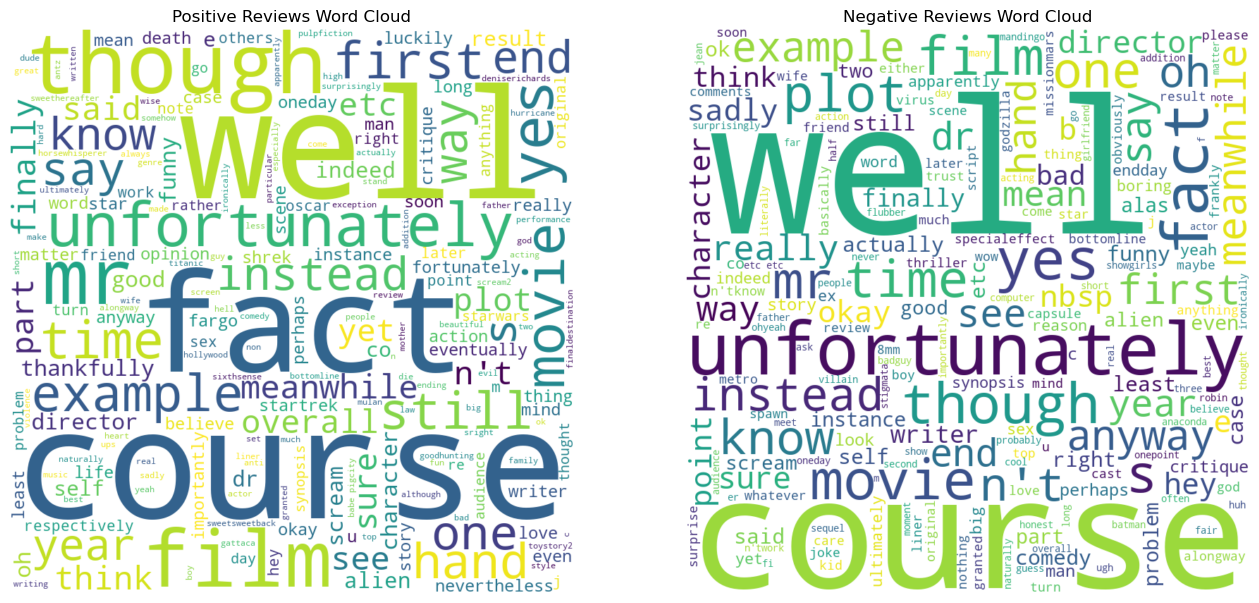

In [22]:
#Generate word clouds for positive and negative sentiments
pos_wordcloud=WordCloud(width=800, height=800, background_color='white').generate(''.join(pos_words))
neg_wordcloud=WordCloud(width=800, height=800, background_color='white').generate(''.join(neg_words))

#plot the word clouds

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(neg_wordcloud, interpolation= 'bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')


# Perform Sentiment Analysis

Step 1: Data Preprocessing
    
    First, clean and preprocess the text data. This includes converting text to lowercase, removing special characters,
    tokenizing words, and stemming or lemmatizing

In [23]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [24]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'\W','',text)
    text=re.sub(r'\s+', '',text)
    
    tokens=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    stemmer=PorterStemmer()
    
    tokens= [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ''.join(tokens)

reviews_df['processed_review']=reviews_df['review'].apply(preprocess_text)
reviews_df.head()

,review,sentiment,review_length,processed_review
0,films adapted from comic books have had plenty...,positive,802,filmsadaptedfromcomicbookshavehadplentyofsucce...
1,every now and then a movie comes along from a ...,positive,769,everynowandthenamoviecomesalongfromasuspectstu...
2,you've got mail works alot better than it dese...,positive,465,youvegotmailworksalotbetterthanitdeservestoino...
3,""" jaws "" is a rare film that grabs your atten...",positive,1178,jawsisararefilmthatgrabsyourattentionbeforeits...
4,moviemaking is a lot like being the general ma...,positive,748,moviemakingisalotlikebeingthegeneralmanagerofa...


# Step 2 : Split the dataset

Now we will divide the preprocessed data into training and testing datasets with 80:20 ratio

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X=reviews_df['processed_review']
y=reviews_df['sentiment']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Step 3: Feature Extraction

Convert the preprocessed text into numerical features using techniques like Bag of Words. TF-IDS, or word embeddings. 
In this example we will use the TF-IDF vectorizer.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vectorizer=TfidfVectorizer(max_features=2000,min_df=0,max_df=1)
X_train_vec=vectorizer.fit_transform(X_train).toarray()
X_test_vec=vectorizer.transform(X_test).toarray()

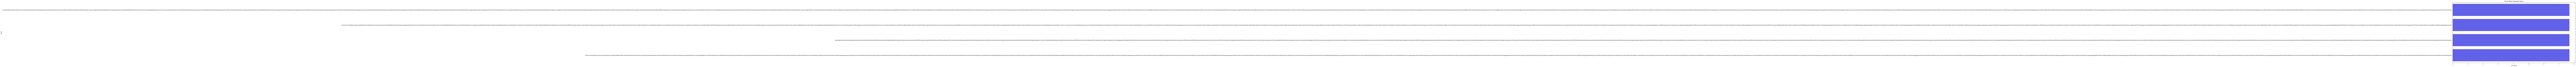

In [74]:
#Get the feature names (words) and their corresponding idf values
feature_names=np.array(vectorizer.get_feature_names_out())
idf_values=vectorizer.idf_
#sort by idf valuesd in descending order and take the top 20 

top_n=4
sorted_indices=idf_values.argsort()[::-1][:top_n]
top_terms=feature_names[sorted_indices]
top_idf_values=idf_values[sorted_indices]

#Create a horizontal bar plot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(x=top_idf_values, y=top_terms, color='blue', alpha=0.7)
plt.title('Top 20 Most Important Terms')
plt.xlabel('IDF Values')
plt.ylabel('Terms')
plt.show()

# Step 4 : Train the Naive Bayes Classifier
        

Using a Naive Bayes implementation(e.g. multinomial naive bayes from scikit learn) train the model on the vectorized 
trining data and corresponding labels

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
clf=MultinomialNB()
clf.fit(X_train_vec,y_train)

MultinomialNB()

# Step 5: Evaluate the model

Test the model`s performance on the vectorized testing data and calculate metrics like accuracy, precision, recall, f1-score

In [77]:
from sklearn.metrics import accuracy_score
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_fscore_support

In [79]:
y_pred=clf.predict(X_test_vec)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy *100:.2f}%')

Accuracy: 50.25%


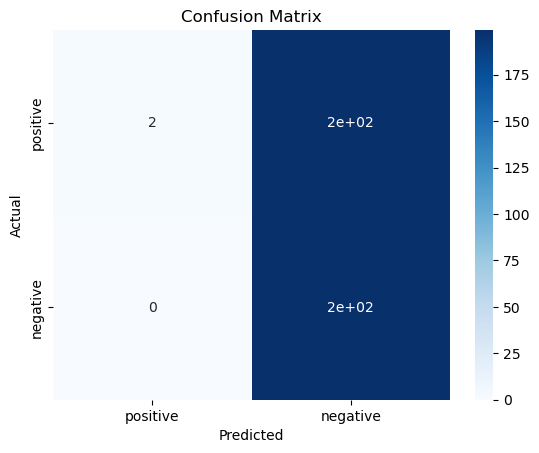

In [87]:
# Create confusion matrix
cm=confusion_matrix(y_test,y_pred)
labels=['positive','negative']
sns.heatmap(cm,annot=True, cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [110]:
#Calculate precision, recall and f1-score
from sklearn.metrics import precision_recall_fscore_support

precision, recall, F1_Score,_=precision_recall_fscore_support(y_test,y_pred,average='binary',pos_label='positive')

#create a pandas df with the evaluation metrics
metrics_df = pd.DataFrame({
    'Sentiment':labels,
    'Precision':precision,
    'Recall':recall,
    'F1-Score':F1_Score
})


ValueError: Could not interpret input 'F1_Score'

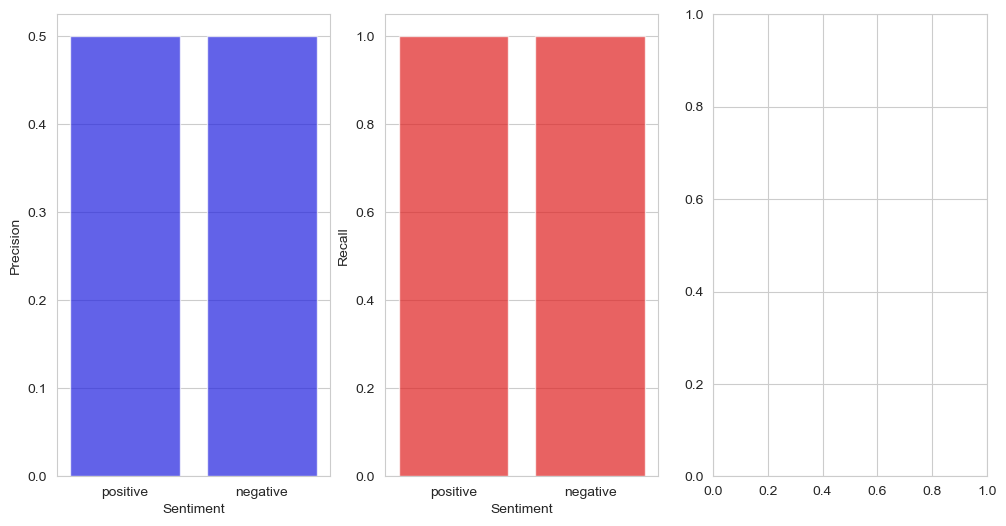

In [113]:
#Set teh stlye for the plots
sns.set_style('whitegrid')
#create a figure with three subplots
fig,ax=plt.subplots(ncols=3,figsize=(12,6))
#plot the metrics as bar charts 

sns.barplot(x='Sentiment',y='Precision',data=metrics_df,color='blue',alpha=0.7,ax=ax[0])
sns.barplot(x='Sentiment',y='Recall',data=metrics_df,color='red',alpha=0.7,ax=ax[1])
sns.barplot(x='Sentiment',y='F1_Score',data=metrics_df,color='green',alpha=0.7,ax=ax[2])

# Set titles and labels for the subplots

ax[0].set_title('Precision')
ax[1].set_title('Recall')
ax[2].set_title('F1_Score')
ax[0].set_xlabel('Sentiment')
ax[1].set_xlabel('Sentiment')
ax[2].set_xlabel('Sentiment')
ax[0].set_ylabel('Score')
ax[1].set_ylabel('')
ax[2].setylabel('')

#set a common y-axis label for the subplots

fig.text(0.06,0.5,'Score',va='center',rotation='vertical')

plt.show()